# Homework 1 by Oskar Chen

## 1a

In [1]:
import numpy as np
from scipy.stats import norm

S = 100
K = 95
T = 0.25
r = 0.04
sigma = 0.35


def bs_call(S, K, T, r, sigma):

    d_1 = (np.log(S/K) + (r + sigma**2/2) * T)/(sigma * np.sqrt(T)) 
    d_2 = d_1 - sigma * np.sqrt(T)
    
    C = S * norm.cdf(d_1) - K * np.exp(-r * T) * norm.cdf(d_2) 
    return C

call_price = bs_call(S, K, T, r, sigma)

print(call_price)

10.147518856561298


## 1b

In [2]:
import numpy as np
from scipy.stats import norm

def bs_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def implied_volatility(C_market, S, K, T, r, sigma_0 = 0.20):
    sigma = sigma_0
    h = 0.001
    
    for i in range(100):
        C_bs = bs_call(S, K, T, r, sigma)
        
        # Vega calculation, I used your code for c' and with sigma as the independent variable
        vega = (bs_call(S, K, T, r, sigma + h) - bs_call(S, K, T, r, sigma - h))/(2 * h)
        
        # Given our goal is to find signma such that call price derived from Black-Scholes is equal to market price,
        # the Newton method becomes the following
        sigma_new = sigma - (C_bs - C_market) / vega
        
        if abs(sigma_new - sigma) < 1e-6:
            return sigma_new
        
        sigma = sigma_new
    
    return sigma

# Strike prices and call prices from chart
strike_prices = np.array([80, 90, 100, 110, 120])
call_prices = np.array([21.73, 13.72, 8.04, 4.61, 2.80])

S = 100  
T = 0.25    
r = 0.04 

# Calculate implied volatility for each strike price
print("Strike Price | Call Price | Implied Volatility")
print("-" * 45)

for i in range(len(strike_prices)):
    K = strike_prices[i]
    C_market = call_prices[i]
    
    implied_vol = implied_volatility(C_market, S, K, T, r)
    print(f"{K:12.0f} | {C_market:10.2f} | {implied_vol:17.4f}")

Strike Price | Call Price | Implied Volatility
---------------------------------------------
          80 |      21.73 |            0.3847
          90 |      13.72 |            0.3698
         100 |       8.04 |            0.3801
         110 |       4.61 |            0.4000
         120 |       2.80 |            0.4300


## 1c

In [3]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import root_scalar

def implied_volatility_root_scalar(C_market, S, K, T, r, sigma_0=0.2):
    # Defines the function representing (market call price) = (Black-Scholes call price)
    def f(sigma):
        return bs_call(S, K, T, r, sigma) - C_market
    
    result = root_scalar(f, x0=sigma_0)
    
    return result.root



print("Strike Price | Call Price | Implied Volatility)")
print("-" * 45)

for i in range(len(strike_prices)):
    K = strike_prices[i]
    C_market = call_prices[i]
    
    try:
        implied_vol = implied_volatility_root_scalar(C_market, S, K, T, r)
        print(f"{K:11.0f} | {C_market:10.2f} | {implied_vol:20.4f}")
    except Exception as e:
        print(f"{K:11.0f} | {C_market:10.2f} | {'Error: ' + str(e)}")

Strike Price | Call Price | Implied Volatility)
---------------------------------------------
         80 |      21.73 |               0.3847
         90 |      13.72 |               0.3698
        100 |       8.04 |               0.3801
        110 |       4.61 |               0.4000
        120 |       2.80 |               0.4300


## 1d

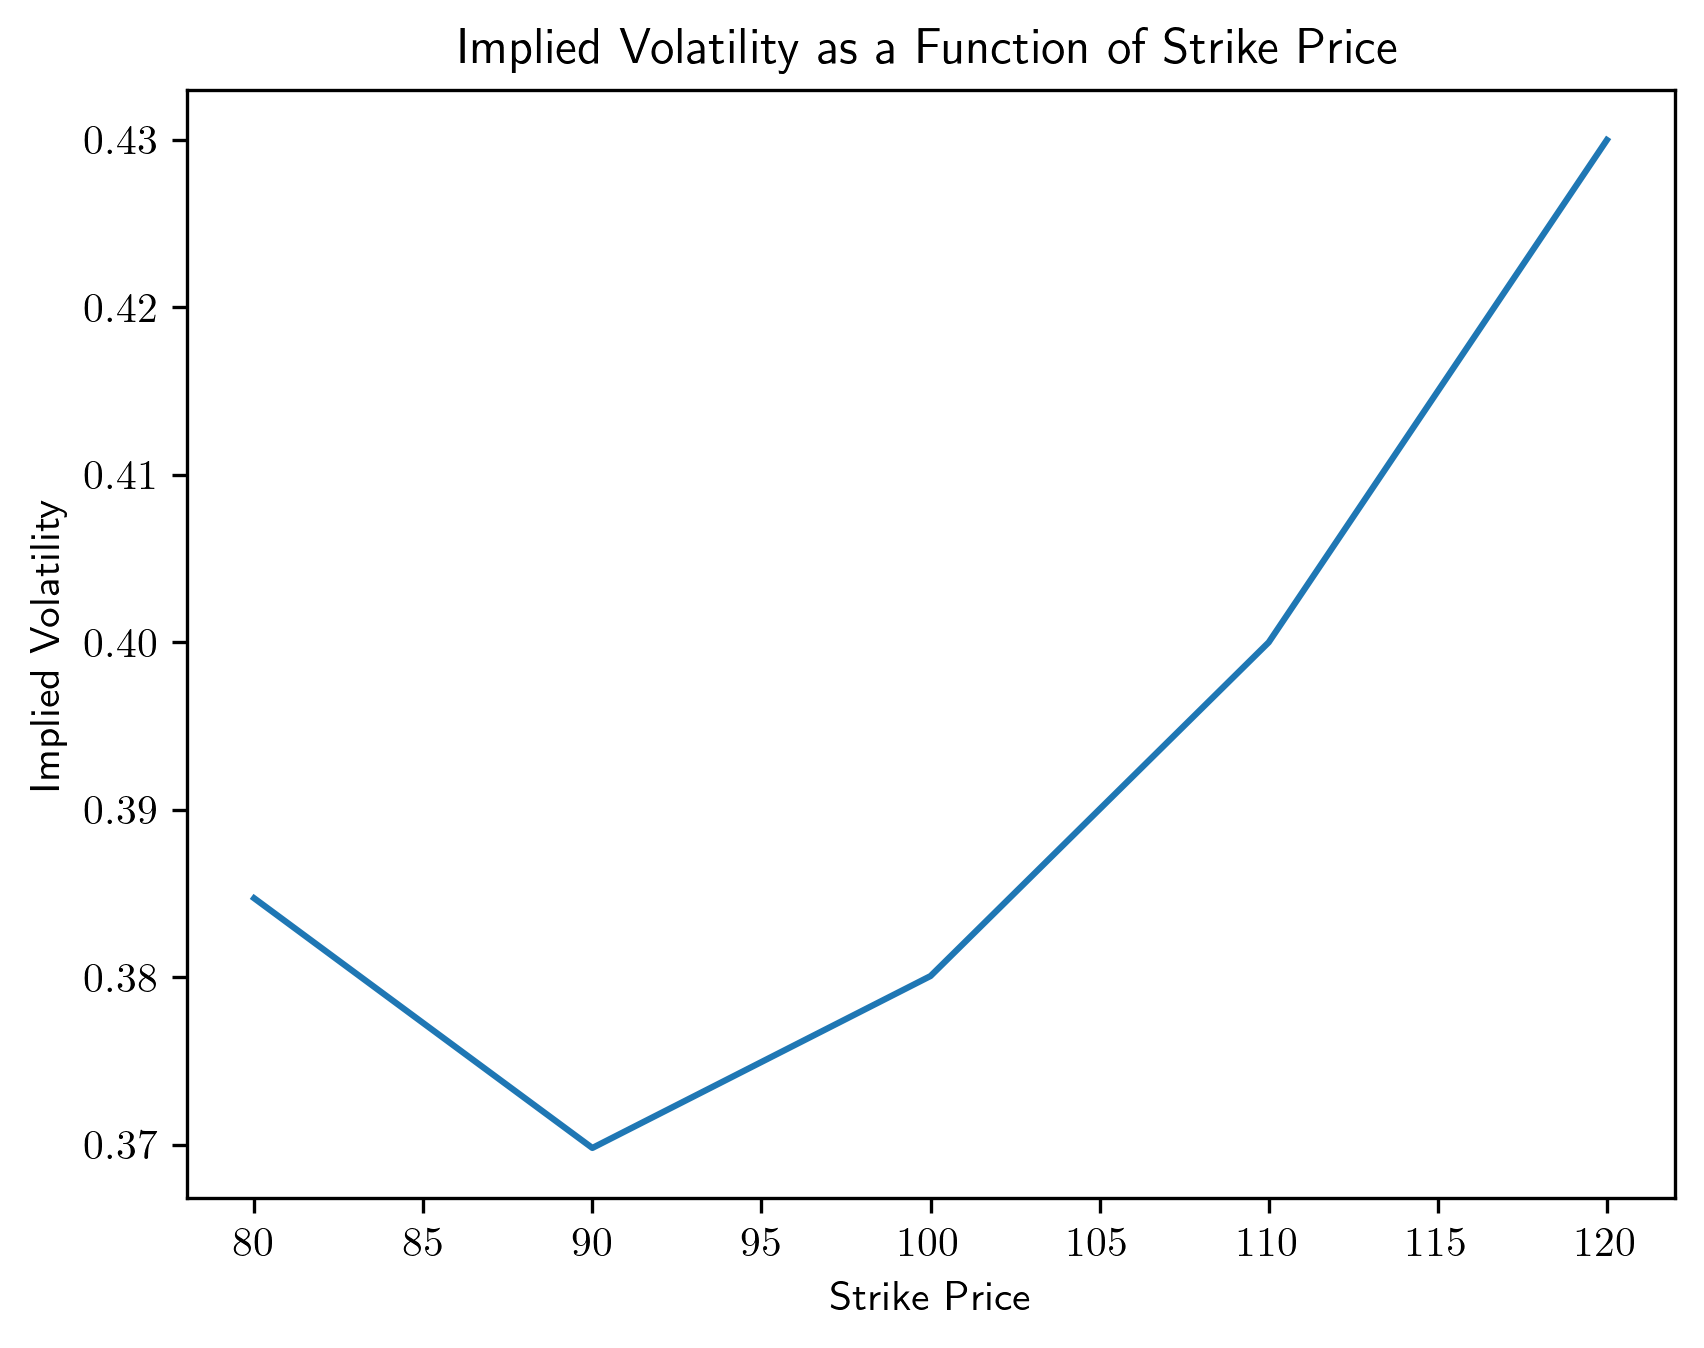

In [11]:
# Import PyPlot
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import root_scalar

# Use LaTeX and increase resolution
plt.rcParams['text.usetex'], plt.rcParams['figure.dpi'] = True, 300

strike_prices = np.array([80, 90, 100, 110, 120])
call_prices = np.array([21.73, 13.72, 8.04, 4.61, 2.80])

S = 100  
T = 0.25    
r = 0.04 


# Calculate implied volatility using function above
implied_vols = []
for i in range(len(strike_prices)):
    K = strike_prices[i]
    C_market = call_prices[i]
    implied_vol = implied_volatility(C_market, S, K, T, r)
    implied_vols.append(implied_vol)

implied_vols = np.array(implied_vols)

# Plot relationship
plt.plot(strike_prices, implied_vols)

# Give plot x- and y-labels
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')

# Add a title
plt.title("Implied Volatility as a Function of Strike Price")

plt.show()

# 2a

In [12]:
# Import numpy
import numpy as np

# Define Riemann sum
def riemann_sum(f, P, pts):
    
    # Sort values
    P = np.sort(P)

    # Calculate Delta x
    dx_vals = np.diff(P) 

    # Define T
    if pts == 'left':

        # Skips the last value
        T = P[:-1]
        
    elif pts == 'right':

        # Skips the first value
        T = P[1:]
        
    elif pts == 'mid':

        # Average of left and right endpoint values
        T = (P[:-1] + P[1:])/2
        
    else:
        raise Exception('Currently only left, right, and midpoints are supported!')
        
    # Get area of rectangles; assumes f is vectorized
    rectangle_areas = f(T) * dx_vals
    
    # Return sum
    return np.sum(rectangle_areas)

In [30]:
# Import pandas
import pandas as pd

# Define function
f = lambda x: np.e**(-x**(1/2))

# Define the n-values
n_vals = [10, 25, 50, 75, 100]

# Define list to hold values
results = pd.DataFrame(index = n_vals, columns = ['left', 'mid', 'right'])

# Loop over values
for n in n_vals:
    
    # We can use np.linspace for a uniform partition
    partition = np.linspace(0, 100, n + 1)
    
    # Get left endpoint results
    results.loc[n, 'left'] = riemann_sum(f, partition, 'left')
    
    # Get midpoint results
    results.loc[n, 'mid'] = riemann_sum(f, partition, 'mid') 
 
    # Get right endpoint results
    results.loc[n, 'right'] = riemann_sum(f, partition, 'right')   

results

,left,mid,right
10,10.614454,1.395763,0.614908
25,5.124692,1.762647,1.124874
50,3.44367,1.895101,1.44376
75,2.920183,1.936789,1.586911
100,2.669385,1.956249,1.669431


# 2b

In [31]:
# Import pandas
import pandas as pd

# Define function
f = lambda x: np.e**(-x**(1/2))

# Define the n-values
n_vals = [10, 25, 50, 75, 100]

# Define list to hold values
results2 = pd.DataFrame(index = n_vals, columns = ['left', 'mid', 'right'])

# Loop over values
for n in n_vals:
    
    # For partitions that sample more small values of x, the spacing described
    # seem to be logarithmic
    partition = np.logspace(0, 2, n + 1, base=10)
    
    # Get left endpoint results
    results2.loc[n, 'left'] = riemann_sum(f, partition, 'left')
    
    # Get midpoint results
    results2.loc[n, 'mid'] = riemann_sum(f, partition, 'mid') 
 
    # Get right endpoint results
    results2.loc[n, 'right'] = riemann_sum(f, partition, 'right')   

results2

,left,mid,right
10,1.969399,1.437359,1.108519
25,1.65079,1.465123,1.311941
50,1.557744,1.469167,1.38871
75,1.528043,1.469918,1.415401
100,1.51343,1.470181,1.428961


# 2c

\begin{align*}
\int_{1}^{100} e^{-\sqrt{x}} \, dx &= \int_{1}^{10} e^{-u} \cdot 2u \, du \\
&= 2\int_{1}^{10} u \cdot e^{-u} \, du
\end{align*}

as $\sqrt{x}$ = u, $\sqrt{100} = 10$ and $\sqrt{1} = 1$

by IBP:
$$
\begin{aligned}
2 \int_{1}^{10} u \cdot e^{-u} \, du &= ( -2 u e^{-u} ) \Bigg|_{1}^{10} + 2 \int_{1}^{10} e^{-u}\\
(-2 u e^{-u} ) \Bigg|_{1}^{10} &= \frac{2(e^9 - 10)}{e^{10}} \\
2 \int_{1}^{10} e^{-u} &= -2 (e^{s}) \Bigg|_{-10}^{-1} = \frac{2-2e^9}{e^{10}}
\end{aligned}
$$

the answer is:
\begin{align*}
\frac{4e^9 - 22}{e^{10}}
\end{align*}

## 2d

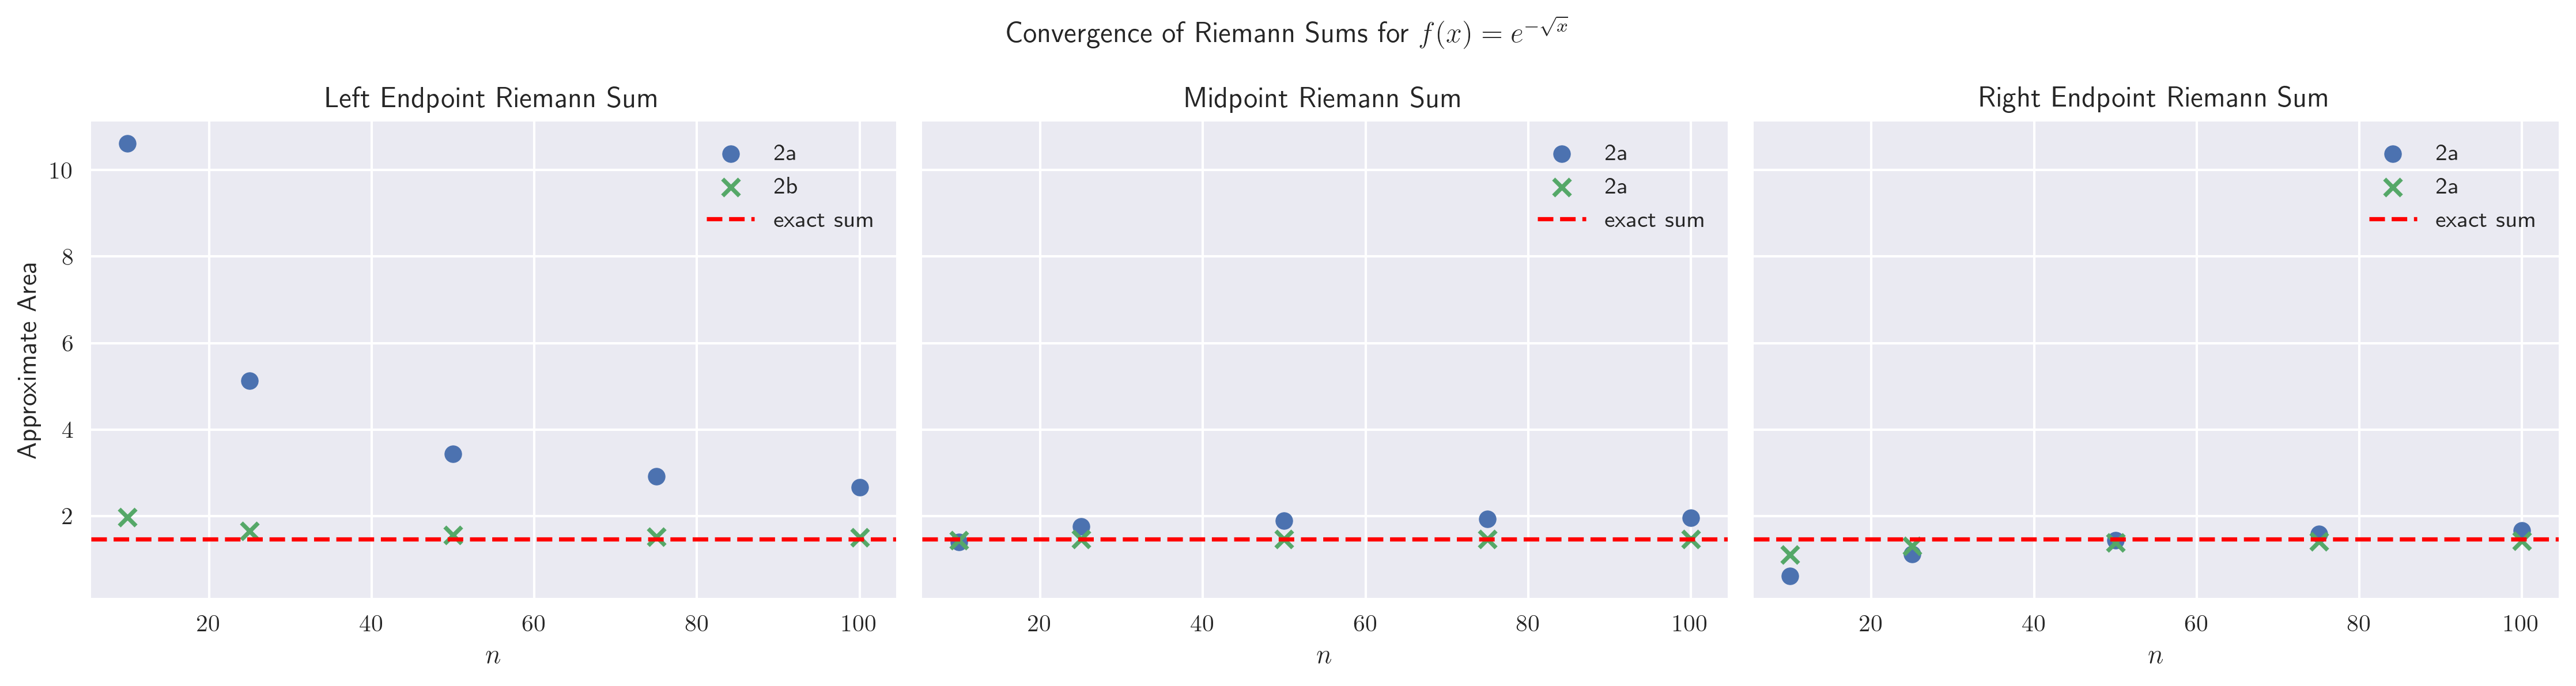

In [50]:
import matplotlib.pyplot as plt

# Convert the results to float (since they are stored as objects)
results = results.astype(float)

# Get the n-values
x = results.index

# Set up 3 scatter plots
fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# Left endpoint plot
ax[0].scatter(x, results['left'], label='2a', marker='o')
ax[0].scatter(x, results2['left'], label='2b', marker='x')
ax[0].axhline(y = (4 * np.exp(9) - 22)/(np.exp(10)), 
              label = 'exact sum', color = 'r', linestyle = 'dashed')
ax[0].set_title('Left Endpoint Riemann Sum')
ax[0].set_xlabel('$n$')
ax[0].set_ylabel('Approximate Area')
ax[0].legend()

# Midpoint plot
ax[1].scatter(x, results['mid'], label='2a', marker='o')
ax[1].scatter(x, results2['mid'], label='2a', marker='x')
ax[1].axhline(y = (4 * np.exp(9) - 22)/(np.exp(10)), 
              label = 'exact sum', color = 'r', linestyle = 'dashed')
ax[1].set_title('Midpoint Riemann Sum')
ax[1].set_xlabel('$n$')
ax[1].legend()


# Right endpoint plot
ax[2].scatter(x, results['right'], label='2a', marker='o')
ax[2].scatter(x, results2['right'], label='2a', marker='x')
ax[2].axhline(y = (4 * np.exp(9) - 22)/(np.exp(10)), 
              label = 'exact sum', color = 'r', linestyle = 'dashed')
ax[2].set_title('Right Endpoint Riemann Sum')
ax[2].set_xlabel('$n$')
ax[2].legend()


# Title here
plt.suptitle('Convergence of Riemann Sums for $f(x) = e^{-\\sqrt{x}}$')

plt.tight_layout()
plt.show()

## 3a

The perpetuity formula is:

PV = C/r, where C is the payment and r is the discount rate.

In this question, C = 10, and r = 0.065

PV = 153.85

## 3b

This perpetuity represents a series that does not converge.

We need to have
$$
\lim_{n \to \infty} a_n = 0
$$
if the series were to converge.

However, $$ a_n = \frac{2024 + n}{1.065^{n}}$$
which approaches infinity as n approaches infinity.

Therefore this perpetuity diverges.

## 3c

This perpetuity, from Year 6 onwards, represent a geometric series with 

\begin{align*}
r &= \frac{1.04}{1.065} \\
\\
a &= \frac{1.10^4 \times 1.04}{1.065}
\end{align*}

We can use the growing perpetuity formula
$$\frac{C}{r-g}$$

which would be $$\frac{1.1^4 \times 1.04}{0.065-0.04} = 60.9065$$ at Year 5

and therefore $$ \frac{60.9065}{1.065^{5}} = 44.4545$$

From Year 1 - 5 the calculation is a little tedious:
\begin{align*}
\frac{1}{1.065} + \frac{1.1}{1.065^{2}} + \frac{1.1^{2}}{1.065^{3}}
+ \frac{1.1^{3}}{1.065^{4}} + \frac{1.1^{4}}{1.065^{5}} = 5.0146
\end{align*}


So the price of the perpetuity is $$44.4545 + 5.0146 = 49.47$$

## 3d

This perpetuity resembles the Maclaurin Series: 

$$e^{x}$$

which is equal to:

$$\sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + \frac{x}{1!} + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots$$

However, instead of a fixed x in the numerator, we have k which is increaing in value.

So, to check for convergence, we use the Ratio Test:


$$\lim_{k \to \infty} \left|\frac{a_{k+1}}{a_k}\right| = \lim_{k \to \infty} \left|\frac{(k+1)^{k+1}/(k+1)!}{k^k/k!}\right| $$

which is equal to:

$$\begin{align}
=\lim_{k \to \infty} \frac{(k+1)^{k+1}}{(k+1)!} \times \frac{k!}{k^k} \\
=\lim_{k \to \infty} \frac{(k+1)^k \times (k+1)}{(k+1) \times k!} \times \frac{k!}{k^k} \\
=\lim_{k \to \infty} \frac{(k+1)^k}{k^k} \\
= \lim_{k \to \infty} \left(\frac{k+1}{k}\right)^k = e \\
\end{align}$$

Since e > 1, the series is divergent